In [ ]:
###### 

In [1]:
###### Loading modules ######

import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.ticker as ticker
import sklearn

##############################

In [ ]:
#Load, process, and merge all the yearly AQI data onto a dataaset. 
#Cut down the dataset to only include the Date/Overall AQI/Main Pollutant. 

In [2]:
###### The four datasets need to be merged into one ######
AQny_17 = pd.read_csv('AQINY17.csv')
AQny_18 = pd.read_csv('AQINY18.csv')
AQny_19 = pd.read_csv('AQINY19.csv')
AQny_20 = pd.read_csv('AQINY20.csv')

In [ ]:
###### Concatenating the datasets 

In [3]:
AQny = pd.concat([AQny_17, AQny_18, AQny_19, AQny_20], ignore_index=True) 
AQny

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,1/1/17,59,PM2.5,Intermediate School 143,36-061-0115,AQS,11,34,11,59,44
1,1/2/17,60,PM2.5,Elizabeth Lab,34-039-0004,AQS,13,33,.,60,43
2,1/3/17,43,PM2.5,PS 19,36-061-0128,AQS,7,32,.,43,42
3,1/4/17,46,PM2.5,PS 19,36-061-0128,AQS,6,32,7,46,27
4,1/5/17,49,PM2.5,FRESHKILLS WEST,36-085-0111,AQS,6,32,.,49,28
...,...,...,...,...,...,...,...,...,...,...,...
1456,12/27/20,55,PM2.5,EISENHOWER PARK,36-059-0005,AQS,6,29,.,55,36
1457,12/28/20,55,PM2.5,Flemington,34-019-0001,AQS,6,30,.,55,42
1458,12/29/20,51,PM2.5,NEWBURGH,36-071-0002,AQS,7,34,8,51,33
1459,12/30/20,45,PM2.5,Elizabeth Lab,34-039-0004,AQS,5,32,.,45,41


In [ ]:
###### Dropping the columns that will not be used ######

In [4]:
AQny = AQny.drop(columns=['Site Name (of Overall AQI)', 'Site ID (of Overall AQI)',  'Source (of Overall AQI)'], axis=1)
#AQny = AQny.drop(columns=['CO', 'Ozone', 'PM10', 'PM25', 'NO2'], axis=1)
AQny #Sometimes the whole thing needs to be reloaded to stop it from throwing up the error about the axis. 

,Date,Overall AQI Value,Main Pollutant,CO,Ozone,PM10,PM25,NO2
0,1/1/17,59,PM2.5,11,34,11,59,44
1,1/2/17,60,PM2.5,13,33,.,60,43
2,1/3/17,43,PM2.5,7,32,.,43,42
3,1/4/17,46,PM2.5,6,32,7,46,27
4,1/5/17,49,PM2.5,6,32,.,49,28
...,...,...,...,...,...,...,...,...
1456,12/27/20,55,PM2.5,6,29,.,55,36
1457,12/28/20,55,PM2.5,6,30,.,55,42
1458,12/29/20,51,PM2.5,7,34,8,51,33
1459,12/30/20,45,PM2.5,5,32,.,45,41


In [5]:
Shooting_incidents = pd.read_csv('Shooting_Incident .csv')

In [ ]:
###### Loading and cleaning up columns that won't be used ######

In [6]:
Shooting_incidents = Shooting_incidents.drop(columns=['INCIDENT_KEY', 'BORO', 'LOC_OF_OCCUR_DESC', 'PRECINCT', 'JURISDICTION_CODE'], axis=1)
Shooting_incidents = Shooting_incidents.drop(columns=['LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'PERP_AGE_GROUP', 'PERP_RACE', 'VIC_AGE_GROUP'], axis=1) 
Shooting_incidents = Shooting_incidents.drop(columns=['VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'PERP_SEX', 'VIC_SEX'], axis=1)  
Shooting_incidents

,OCCUR_DATE,OCCUR_TIME,STATISTICAL_MURDER_FLAG
0,5/27/21,21:30:00,False
1,6/27/14,17:40:00,False
2,11/21/15,3:56:00,True
3,10/9/15,18:30:00,False
4,2/19/09,22:58:00,True
...,...,...,...
27307,5/14/22,3:02:00,False
27308,1/22/22,13:15:00,False
27309,6/18/22,3:29:00,False
27310,6/19/22,20:08:00,False


In [ ]:
###### Classifying the truth values of the statistical murder flag as type int to be used as a count ######

In [7]:
Shooting_incidents['STATISTICAL_MURDER_FLAG'] = Shooting_incidents['STATISTICAL_MURDER_FLAG'].astype(int)
Shooting_incidents

,OCCUR_DATE,OCCUR_TIME,STATISTICAL_MURDER_FLAG
0,5/27/21,21:30:00,0
1,6/27/14,17:40:00,0
2,11/21/15,3:56:00,1
3,10/9/15,18:30:00,0
4,2/19/09,22:58:00,1
...,...,...,...
27307,5/14/22,3:02:00,0
27308,1/22/22,13:15:00,0
27309,6/18/22,3:29:00,0
27310,6/19/22,20:08:00,0


In [ ]:
###### Grouping the data of shooting incidents by occur_time, and summing them together.######

In [8]:
Shooting_incidentsNY = Shooting_incidents.groupby('OCCUR_DATE', as_index=False)['OCCUR_TIME'].sum()

In [ ]:
###### Grouping the data by the date it occured and then counting...
###### ...The total numer of statistical murder flags irrespective of it's...
###### ...Truth value as a counter of how many shooting incidents took place that day. 

In [9]:
Shooting_incidentsNY = Shooting_incidents.groupby('OCCUR_DATE', as_index=False)['STATISTICAL_MURDER_FLAG'].count()

In [ ]:
###### Renaming the columns for easier merging.

In [10]:
Shooting_incidentsNY = Shooting_incidentsNY.rename(columns={'OCCUR_DATE':'Date'})
Shooting_incidentsNY

,Date,STATISTICAL_MURDER_FLAG
0,1/1/06,8
1,1/1/07,18
2,1/1/08,19
3,1/1/09,7
4,1/1/10,8
...,...,...
5756,9/9/16,4
5757,9/9/17,5
5758,9/9/18,2
5759,9/9/20,3


In [ ]:
###### Merging the files on the date they occured. 

In [11]:
Shooting_AQI_Merged = AQny.merge(Shooting_incidentsNY, on='Date')

In [12]:
Shooting_AQI_Merged

,Date,Overall AQI Value,Main Pollutant,CO,Ozone,PM10,PM25,NO2,STATISTICAL_MURDER_FLAG
0,1/1/17,59,PM2.5,11,34,11,59,44,7
1,1/2/17,60,PM2.5,13,33,.,60,43,7
2,1/3/17,43,PM2.5,7,32,.,43,42,3
3,1/4/17,46,PM2.5,6,32,7,46,27,2
4,1/5/17,49,PM2.5,6,32,.,49,28,1
...,...,...,...,...,...,...,...,...,...
1264,12/27/20,55,PM2.5,6,29,.,55,36,6
1265,12/28/20,55,PM2.5,6,30,.,55,42,2
1266,12/29/20,51,PM2.5,7,34,8,51,33,5
1267,12/30/20,45,PM2.5,5,32,.,45,41,2


In [13]:
Shooting_AQI_Merged.to_csv('Merge_df.csv')

In [ ]:
###### Getting a description of the data 

In [92]:
Shooting_AQI_Merged.describe()

,Overall AQI Value,CO,Ozone,PM25,NO2,STATISTICAL_MURDER_FLAG
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.00000,1269.000000
mean,56.943262,7.663515,46.781718,47.574468,36.57368,3.816391
std,22.482589,3.331728,24.169821,15.053171,12.69269,3.424975
min,25.000000,2.000000,12.000000,12.000000,8.00000,1.000000
25%,42.000000,6.000000,32.000000,36.000000,28.00000,2.000000
50%,51.000000,7.000000,40.000000,47.000000,35.00000,3.000000
75%,64.000000,9.000000,48.000000,56.000000,43.00000,5.000000
max,210.000000,32.000000,210.000000,127.000000,107.00000,47.000000


In [ ]:
###### Some cursory scatterplots of the data as plotted against the count of murder flags. 

<AxesSubplot:xlabel='PM25', ylabel='STATISTICAL_MURDER_FLAG'>

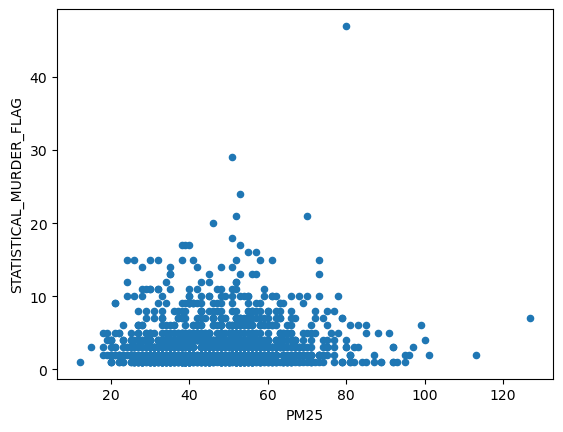

In [14]:
Shooting_AQI_Merged.plot(kind='scatter', x='PM25', y='STATISTICAL_MURDER_FLAG')

<AxesSubplot:xlabel='PM10', ylabel='STATISTICAL_MURDER_FLAG'>

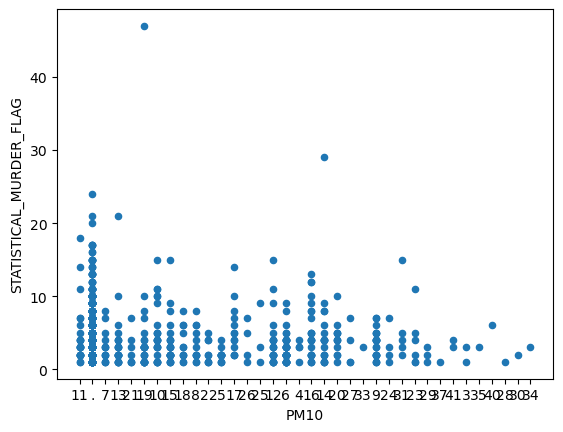

In [15]:
Shooting_AQI_Merged.plot(kind='scatter', x='PM10', y='STATISTICAL_MURDER_FLAG')

<AxesSubplot:xlabel='Ozone', ylabel='STATISTICAL_MURDER_FLAG'>

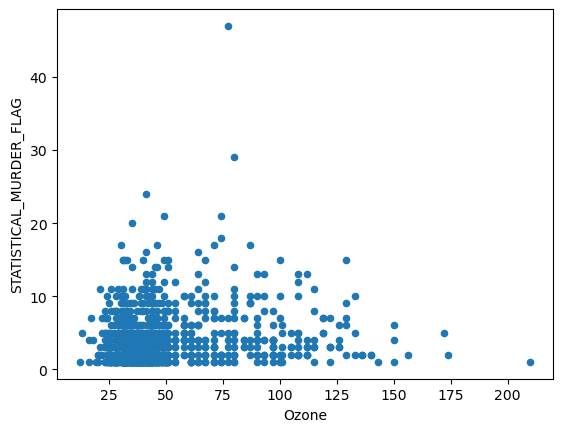

In [16]:
Shooting_AQI_Merged.plot(kind='scatter', x='Ozone', y='STATISTICAL_MURDER_FLAG')

<AxesSubplot:xlabel='CO', ylabel='STATISTICAL_MURDER_FLAG'>

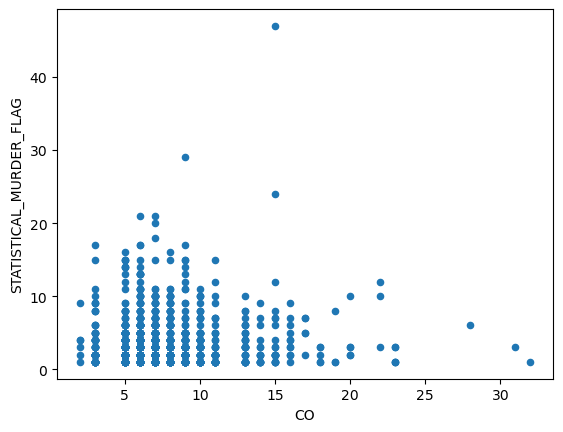

In [17]:
Shooting_AQI_Merged.plot(kind='scatter', x='CO', y='STATISTICAL_MURDER_FLAG')

<AxesSubplot:xlabel='NO2', ylabel='STATISTICAL_MURDER_FLAG'>

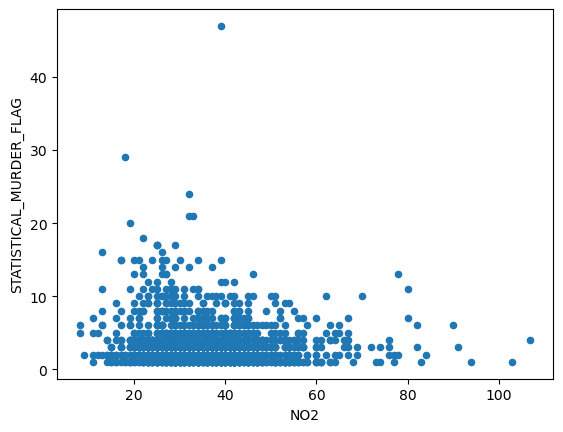

In [18]:
Shooting_AQI_Merged.plot(kind='scatter', x='NO2', y='STATISTICAL_MURDER_FLAG')

In [ ]:
###### Getting the correlation of the dataset columns with one another ######

In [19]:
print(Shooting_AQI_Merged.corr())

                         Overall AQI Value        CO     Ozone      PM25  \
Overall AQI Value                 1.000000  0.193858  0.824909  0.693410   
CO                                0.193858  1.000000 -0.092032  0.427906   
Ozone                             0.824909 -0.092032  1.000000  0.305188   
PM25                              0.693410  0.427906  0.305188  1.000000   
NO2                               0.387275  0.450822  0.092898  0.451717   
STATISTICAL_MURDER_FLAG           0.110138  0.013587  0.147744  0.046499   

                              NO2  STATISTICAL_MURDER_FLAG  
Overall AQI Value        0.387275                 0.110138  
CO                       0.450822                 0.013587  
Ozone                    0.092898                 0.147744  
PM25                     0.451717                 0.046499  
NO2                      1.000000                -0.131077  
STATISTICAL_MURDER_FLAG -0.131077                 1.000000  


In [74]:
############################################################
############################################################

In [ ]:
###### Modules for linear regression and onehotencoding the main pollutant column...
######

In [20]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
###### Encoding the categoical column for the X value to be fed into the linear regression model. 

In [21]:
X = Shooting_AQI_Merged['Main Pollutant'].values.reshape(-1, 1)
Main_encoded = OneHotEncoder().fit(X)

In [22]:
X = Main_encoded.transform(X).toarray()
print(X)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
###### Reshaping Y. 

In [28]:
y = Shooting_AQI_Merged['STATISTICAL_MURDER_FLAG'].values.reshape(-1, 1)

In [ ]:
###### Splitting our test and train sets for supervised learning

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [76]:
shoot_New_model = linear_model.LinearRegression()

In [ ]:
###### Fitting to model 

In [77]:
shoot_New_model = LinearRegression().fit(X_train, y_train)

In [ ]:
###### Getting the intercept for the model 

In [78]:
print(shoot_New_model.intercept_)

[3.62570931]


In [ ]:
###### Model Coefficient

In [79]:
shoot_New_model.coef_

array([[-0.54535217,  0.53013484,  0.01521733]])

In [ ]:
###### Predicting the Y values given the X_test set of our dataset. 

In [80]:
Y_pred_new = shoot_New_model.predict(X_test)

In [ ]:
###### Visualization of linear regression model of seperate values for each particulate/pollutant.

<AxesSubplot:xlabel='Ozone', ylabel='STATISTICAL_MURDER_FLAG'>

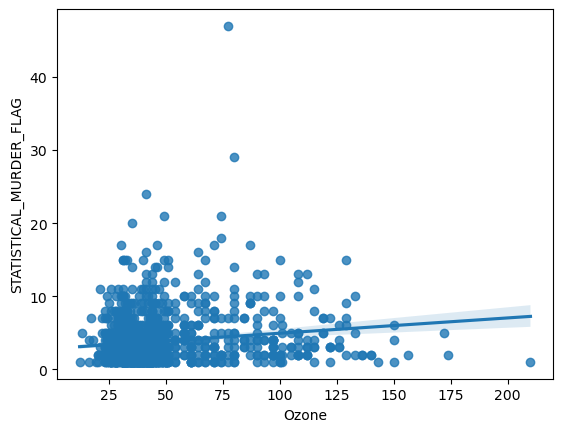

In [87]:
sns.regplot(x='Ozone', y='STATISTICAL_MURDER_FLAG', data=Shooting_AQI_Merged)

<AxesSubplot:xlabel='NO2', ylabel='STATISTICAL_MURDER_FLAG'>

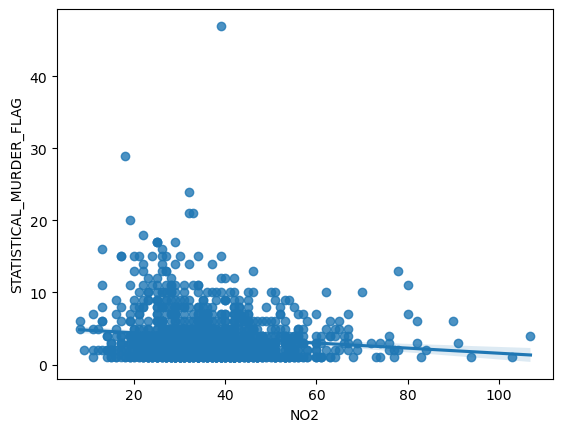

In [88]:
sns.regplot(x='NO2', y='STATISTICAL_MURDER_FLAG', data=Shooting_AQI_Merged)

<AxesSubplot:xlabel='CO', ylabel='STATISTICAL_MURDER_FLAG'>

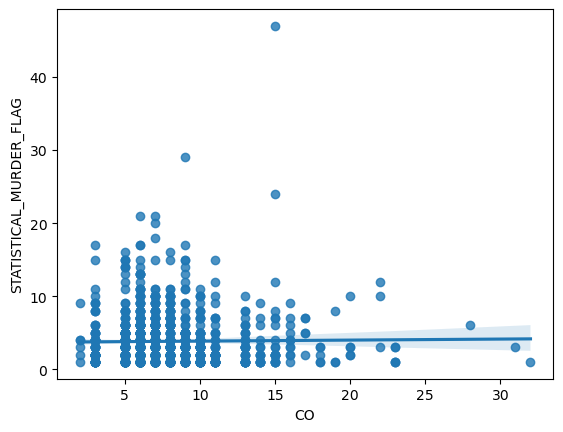

In [89]:
sns.regplot(x='CO', y='STATISTICAL_MURDER_FLAG', data=Shooting_AQI_Merged)

<AxesSubplot:xlabel='PM25', ylabel='STATISTICAL_MURDER_FLAG'>

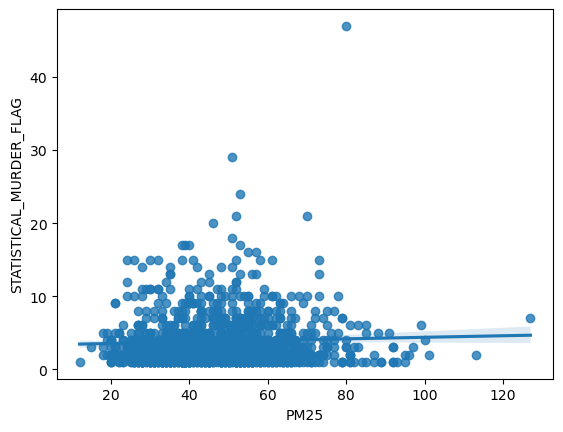

In [91]:
sns.regplot(x='PM25', y='STATISTICAL_MURDER_FLAG', data=Shooting_AQI_Merged)